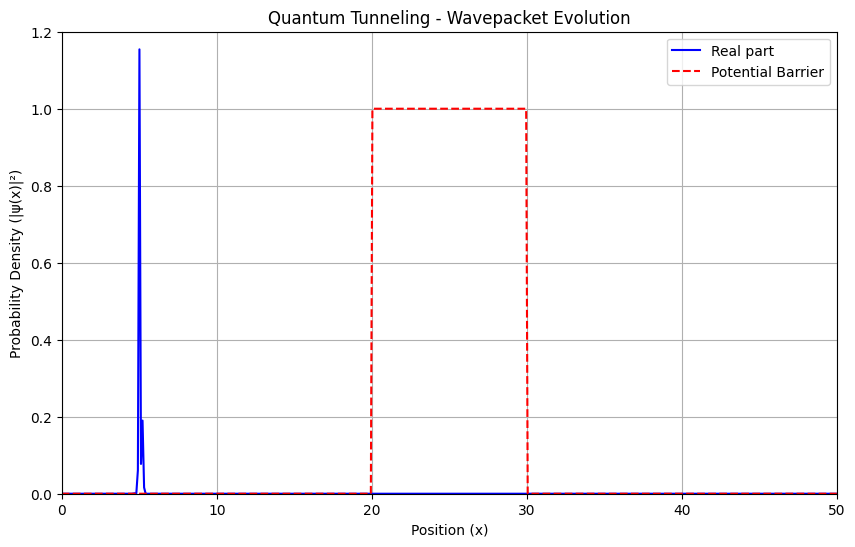

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define Parameters
L = 50  # Length of the domain
Nx = 500  # Number of spatial points
x = np.linspace(0, L, Nx)  # Space grid
dx = x[1] - x[0]  # Spatial step

# Create the potential barrier (a simple rectangular barrier)
V0 = 50  # Height of the barrier
x_barrier_start = 20  # Start of the barrier
x_barrier_end = 30  # End of the barrier
V = np.zeros_like(x)  # Potential array, initially all zero (no barrier)
V[(x >= x_barrier_start) & (x <= x_barrier_end)] = V0  # Apply barrier

# Parameters for the wavepacket
x0 = 5  # Initial position of the wavepacket
width = 1  # Width of the wavepacket
k0 = 4  # Initial wave number (momentum)
sigma = 0.1  # Width of the Gaussian envelope

# Time parameters
dt = 0.01  # Time step
t_max = 10  # Maximum time for animation
num_frames = int(t_max / dt)  # Number of frames for the animation

# Initialize the wavefunction (Gaussian wavepacket)
psi_init = np.exp(-0.5 * ((x - x0) / sigma)**2) * np.exp(1j * k0 * x)  # Initial wavepacket

# Time evolution: use a simple finite-difference approximation for TDSE
def evolve_wavefunction(psi, V, dt, dx):
    # First derivative in space (central difference)
    d2psi_dx2 = np.roll(psi, -1) - 2*psi + np.roll(psi, 1)
    d2psi_dx2 /= dx**2

    # Time evolution using the explicit scheme
    return psi - 1j * dt * (-0.5 * d2psi_dx2 + V * psi)

# Initialize figure and axis for animation
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, np.real(psi_init)**2, label="Real part", color='blue')
ax.set_xlim(0, L)
ax.set_ylim(0, 1.2)
ax.set_title("Quantum Tunneling - Wavepacket Evolution")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density (|ψ(x)|²)")
ax.grid(True)
ax.plot(x, V / max(V), label="Potential Barrier", color='red', linestyle='--')
ax.legend()

# Animation update function
def update(frame):
    global psi_init
    # Evolve the wavefunction over time
    psi_init = evolve_wavefunction(psi_init, V, dt, dx)
    
    # Update the plot with the new wavepacket
    line.set_ydata(np.real(psi_init)**2)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=50, blit=True)

# Show the animation
plt.show()


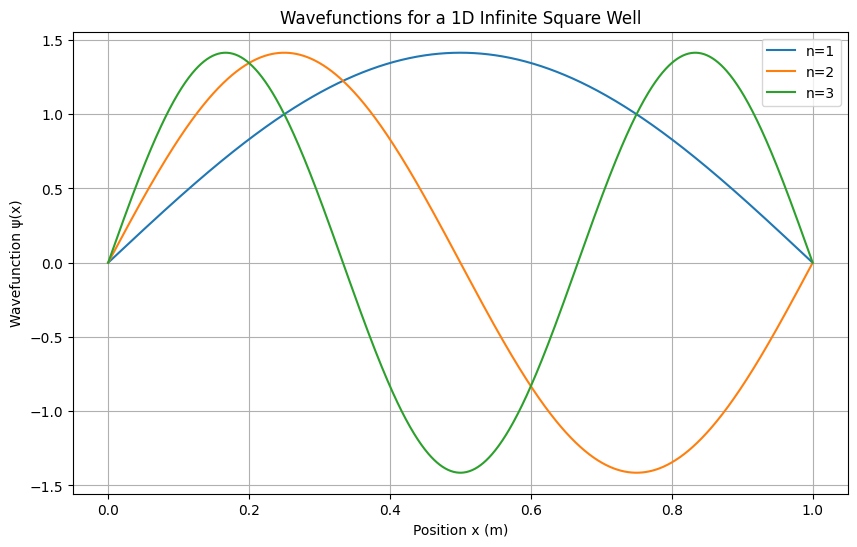

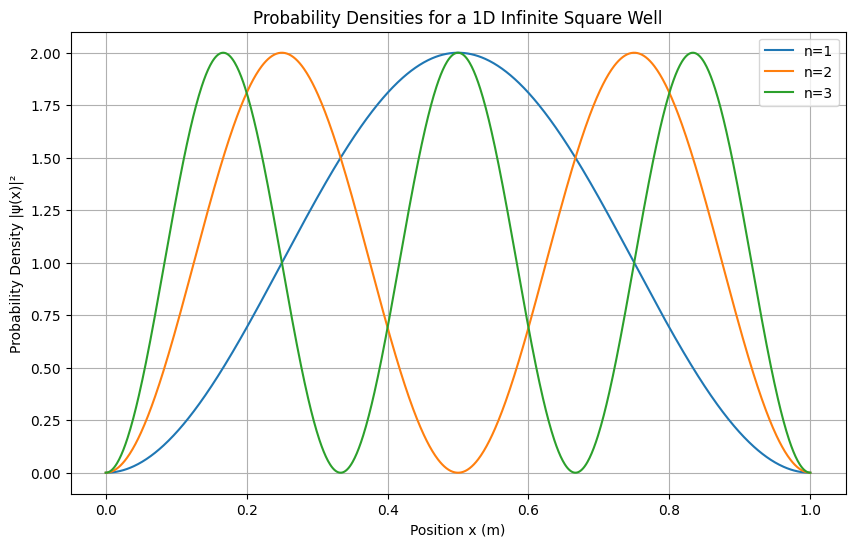

Normalization for n=1: 1.0000000000000002
Normalization for n=2: 1.0000000000000002
Normalization for n=3: 1.0


/var/folders/b8/t7dp_sr55_zdq7sdnc7dq87m0000gn/T/ipykernel_1544/1130233779.py:45: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalization = np.trapz(psi**2, x)


<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # Well length
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
m = 9.10938356e-31  # Mass of an electron (kg)
def wavefunction(n, x, L):
    """Wavefunction for the nth energy level in an infinite square well."""
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

def energy(n, L):
    """Energy for the nth energy level in an infinite square well."""
    return (n**2 * np.pi**2 * hbar**2) / (2 * m * L**2)
x = np.linspace(0, L, 1000)  # High-resolution spatial grid
n_values = [1, 2, 3]  # Quantum numbers to visualize
plt.figure(figsize=(10, 6))

for n in n_values:
    psi = wavefunction(n, x, L)
    plt.plot(x, psi, label=f"n={n}")

plt.title("Wavefunctions for a 1D Infinite Square Well")
plt.xlabel("Position x (m)")
plt.ylabel("Wavefunction ψ(x)")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 6))

for n in n_values:
    psi = wavefunction(n, x, L)
    prob_density = psi**2
    plt.plot(x, prob_density, label=f"n={n}")

plt.title("Probability Densities for a 1D Infinite Square Well")
plt.xlabel("Position x (m)")
plt.ylabel("Probability Density |ψ(x)|²")
plt.legend()
plt.grid()
plt.show()

for n in n_values:
    psi = wavefunction(n, x, L)
    normalization = np.trapz(psi**2, x)
    print(f"Normalization for n={n}: {normalization}")

    plt.savefig(f"wavefunctions_{L}m.png")




In [57]:
from qutip import basis,tensor,qeye
import numpy as np

# Step 1: Define basis states
n_qubits = 3
N = 2**n_qubits
basis_states = [basis(N, i) for i in range(N)]

# Step 2: Define the initial uniform superposition state
psi0 = tensor([basis(2, 0) + basis(2, 1) for _ in range(n_qubits)]).unit()

# Step 3: Define the Oracle for the marked state (e.g., |101⟩)
marked_index = 5  # |101⟩
oracle = qeye(N) - 2 * basis(N, marked_index) * basis(N, marked_index).dag()

# Step 4: Define the diffusion operator
mean_state = sum(basis_states).unit()
diffusion = 2 * mean_state * mean_state.dag() - qeye(N)

# Step 5: Apply Grover's iterations
grover_operator = diffusion * oracle
iterations = int(np.floor(np.pi / 4 * np.sqrt(N)))

state = psi0
for _ in range(iterations):
    state = grover_operator * state

# Step 6: Display results
probs = [abs((state.dag() * basis(N, i))[0, 0])**2 for i in range(N)]
print("Probabilities of finding each state:")
for i, prob in enumerate(probs):
    print(f"State |{i:03b}⟩: {prob:.4f}")


TypeError: incompatible dimensions [[8], [8]] and [[2, 2, 2], [1, 1, 1]]

In [56]:
from qutip import basis, tensor,Qobj

# Step 1: Define the Bell state |Φ+⟩ = (|00⟩ + |11⟩) / √2
bell_state = (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1))).unit()

# Step 2: Define measurement operators (projectors for |00⟩, |01⟩, |10⟩, |11⟩)
P00 = tensor(basis(2, 0) * basis(2, 0).dag(), basis(2, 0) * basis(2, 0).dag())
P01 = tensor(basis(2, 0) * basis(2, 0).dag(), basis(2, 1) * basis(2, 1).dag())
P10 = tensor(basis(2, 1) * basis(2, 1).dag(), basis(2, 0) * basis(2, 0).dag())
P11 = tensor(basis(2, 1) * basis(2, 1).dag(), basis(2, 1) * basis(2, 1).dag())

# Step 3: Compute probabilities of outcomes
prob_00 = Qobj((bell_state.dag() * P00 * bell_state)).full()[0, 0]
prob_01 = Qobj((bell_state.dag() * P01 * bell_state)).full()[0, 0]
prob_10 = Qobj((bell_state.dag() * P10 * bell_state)).full()[0, 0]
prob_11 = Qobj((bell_state.dag() * P11 * bell_state)).full()[0, 0]

# Step 4: Display results
print(f"Probability of |00⟩: {prob_00}")
print(f"Probability of |01⟩: {prob_01}")
print(f"Probability of |10⟩: {prob_10}")
print(f"Probability of |11⟩: {prob_11}")


Probability of |00⟩: (0.4999999999999999+0j)
Probability of |01⟩: 0j
Probability of |10⟩: 0j
Probability of |11⟩: (0.4999999999999999+0j)


In [47]:
from qutip import basis, tensor, Qobj, ket2dm,expect
import numpy as np

# Initial state: |00>
psi0 = tensor(basis(2, 0), basis(2, 0))  # A 4-dimensional state in QuTiP format

# Define gates using NumPy
# 1. Hadamard gate for 1 qubit
H_1q = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# Extend Hadamard to act on the first qubit (2-qubit system)
H_matrix = np.kron(H_1q, np.eye(2))  # Tensor product: H ⊗ I
H = Qobj(H_matrix, dims=[[2, 2], [2, 2]])  # Match QuTiP's dimension format

# 2. CNOT gate
CNOT_matrix = np.array([
    [1, 0, 0, 0],  # |00⟩ -> |00⟩
    [0, 1, 0, 0],  # |01⟩ -> |01⟩
    [0, 0, 0, 1],  # |10⟩ -> |11⟩
    [0, 0, 1, 0],  # |11⟩ -> |10⟩
])
CNOT = Qobj(CNOT_matrix, dims=[[2, 2], [2, 2]])  # Match QuTiP's dimension format

# Apply gates
psi1 = H * psi0  # Apply Hadamard to the first qubit
psi_bell = CNOT * psi1  # Apply CNOT gate

# Print final state
print("Bell state:")
print(psi_bell)

# Verify entanglement by partial tracing
rho = ket2dm(psi_bell)
rho1 = rho.ptrace(0)  # Partial trace over the second qubit
rho2 = rho.ptrace(1)  # Partial trace over the first qubit
print("Reduced density matrix of qubit 0:\n", rho1)
print("Reduced density matrix of qubit 1:\n", rho2)




Bell state:
Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]
Reduced density matrix of qubit 0:
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]
Reduced density matrix of qubit 1:
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]


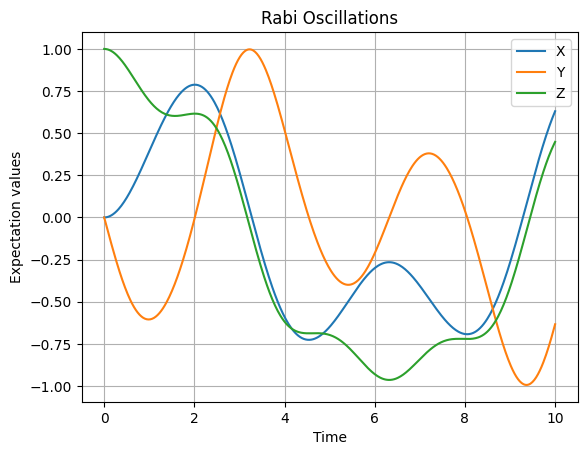

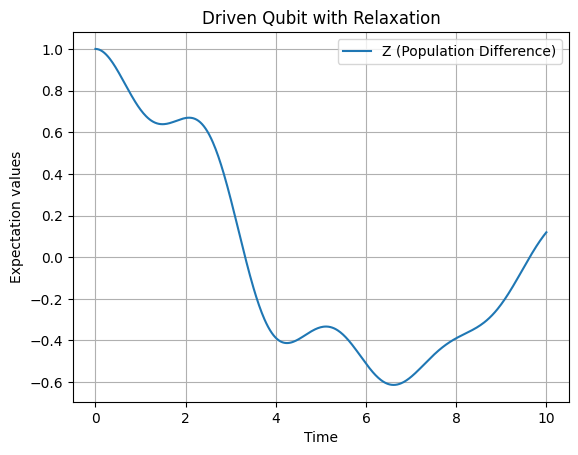

Final State:


IndexError: list index out of range

In [41]:
from qutip import sigmax, sigmaz, mesolve, basis, sigmay, destroy,tensor
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Energy gap
Omega = 0.5  # Driving amplitude
H0 = (omega / 2) * sigmaz()  # Free Hamiltonian
Hd = Omega * sigmax()  # Driving term

# Time-dependent Hamiltonian
H = [H0, [Hd, "cos(omega * t)"]]

# Initial state
psi0 = basis(2, 0)  # Start in the ground state

# Time evolution
t = np.linspace(0, 10, 500)  # Time points
args = {"omega": omega}
result = mesolve(H, psi0, t, [], [sigmax(), sigmay(), sigmaz()], args=args)

# Plotting results
plt.figure()
plt.plot(t, result.expect[0], label="X")
plt.plot(t, result.expect[1], label="Y")
plt.plot(t, result.expect[2], label="Z")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.title("Rabi Oscillations")
plt.legend()
plt.grid()
plt.show()
# Collapse operators for dissipation
gamma = 0.1
c_ops = [np.sqrt(gamma) * destroy(2)]  # Amplitude damping

# Solve with dissipation
result = mesolve(H, psi0, t, c_ops, [sigmax(), sigmay(), sigmaz()], args=args)

# Plot results
plt.figure()
plt.plot(t, result.expect[2], label="Z (Population Difference)")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.title("Driven Qubit with Relaxation")
plt.legend()
plt.grid()
plt.show()
from qutip import *
import numpy as np

# Two-qubit Hilbert space
I = identity(2)  # Identity operator
sx = sigmax()  # Pauli-X
sy = sigmay()  # Pauli-Y
sz = sigmaz()  # Pauli-Z

# Interaction Hamiltonian
J = 0.2  # Coupling strength
H = J * (tensor(sx, sx) + tensor(sy, sy) + tensor(sz, sz))

# Initial state (|0⟩ ⊗ |1⟩)
psi0 = tensor(basis(2, 0), basis(2, 1))

# Time evolution
t = np.linspace(0, 10, 100)
result = mesolve(H, psi0, t, [], [tensor(sx, I), tensor(I, sx), tensor(sz, sz)])

# Visualization of the final state
print("Final State:")
print(result.states[-1])




/Users/kaustavprakashsarma/qutip_env/lib/python3.12/site-packages/qutip/core/coefficient.py:386: UserWarning: Both `cython` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
  warnings.warn(


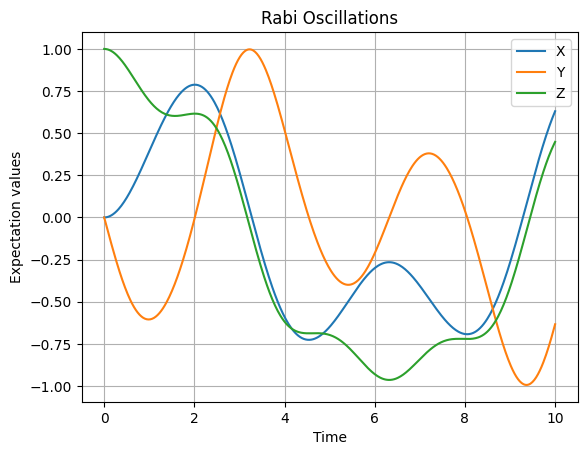

In [26]:
from qutip import sigmax, sigmaz, mesolve, basis, sigmay
import numpy as np
import matplotlib.pyplot as plt

# Parameters
omega = 1.0  # Energy gap
Omega = 0.5  # Driving amplitude
H0 = (omega / 2) * sigmaz()  # Free Hamiltonian
Hd = Omega * sigmax()  # Driving term

# Time-dependent Hamiltonian
H = [H0, [Hd, "cos(omega * t)"]]

# Initial state
psi0 = basis(2, 0)  # Start in the ground state

# Time evolution
t = np.linspace(0, 10, 500)  # Time points
args = {"omega": omega}
result = mesolve(H, psi0, t, [], [sigmax(), sigmay(), sigmaz()], args=args)

# Plotting results
plt.figure()
plt.plot(t, result.expect[0], label="X")
plt.plot(t, result.expect[1], label="Y")
plt.plot(t, result.expect[2], label="Z")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.title("Rabi Oscillations")
plt.legend()
plt.grid()
plt.show()


Initial state density matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

State after phase damping:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5       0.4472136]
 [0.4472136 0.5      ]]

State after combining phase and amplitude damping:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.65       0.37416574]
 [0.37416574 0.35      ]]


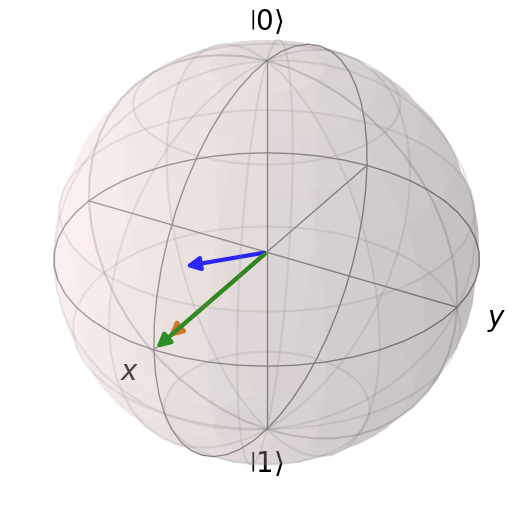

In [25]:
import numpy as np 
from qutip import basis, ket2dm, Qobj, Bloch
psi = basis(2,0) + basis(2,1)
psi = psi.unit()

rho = ket2dm(psi)
gamma_phase = 0.2
K0_phase = Qobj([[1, 0], [0, np.sqrt(1 - gamma_phase)]])
K1_phase = Qobj([[0, 0], [0, np.sqrt(gamma_phase)]])

rho_phase = K0_phase*rho*K0_phase.dag() + K1_phase*rho*K1_phase.dag()
gamma_amplitude = 0.3  # Amplitude-damping probability
K0_amplitude = Qobj([[1, 0], [0, np.sqrt(1 - gamma_amplitude)]])
K1_amplitude = Qobj([[0, np.sqrt(gamma_amplitude)], [0, 0]])

# Apply amplitude damping to the state after phase damping
rho_combined = K0_amplitude * rho_phase * K0_amplitude.dag() + K1_amplitude * rho_phase * K1_amplitude.dag()

# Print the results
print("Initial state density matrix:")
print(rho)

print("\nState after phase damping:")
print(rho_phase)

print("\nState after combining phase and amplitude damping:")
print(rho_combined)

# Visualize on the Bloch sphere
b = Bloch()
b.add_states(rho)            # Initial state
b.add_states(rho_phase)      # After phase damping
b.add_states(rho_combined)   # After both channels
b.show()

Initial state density matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

State after amplitude damping:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.65       0.41833001]
 [0.41833001 0.35      ]]


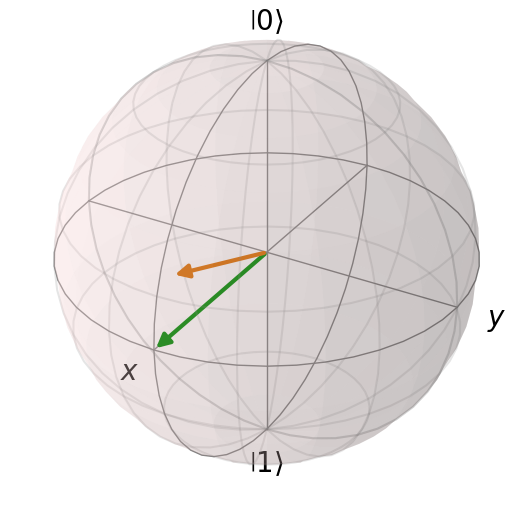

In [ ]:
import numpy as np
from qutip import basis, ket2dm, Qobj, Bloch

# Define the initial quantum state
psi = basis(2, 0) + basis(2, 1)  # Superposition state |0> + |1>
psi = psi.unit()  # Normalize the state

# Density matrix
rho = ket2dm(psi)

# amp damping channel
gamma = 0.3  # Damping probability
K0 = Qobj([[1, 0], [0, np.sqrt(1 - gamma)]])
K1 = Qobj([[0, np.sqrt(gamma)], [0, 0]])

# Apply the Kraus operators
rho_prime = K0 * rho * K0.dag() + K1 * rho * K1.dag()

# Print the result
print("Initial state density matrix:")
print(rho)

print("\nState after amplitude damping:")
print(rho_prime)

# Visualize on the Bloch sphere
b = Bloch()
b.add_states(rho)       # Initial state
b.add_states(rho_prime) # Final state
b.show()


Initial state density matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

State after phase damping:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.41833001]
 [0.41833001 0.5       ]]


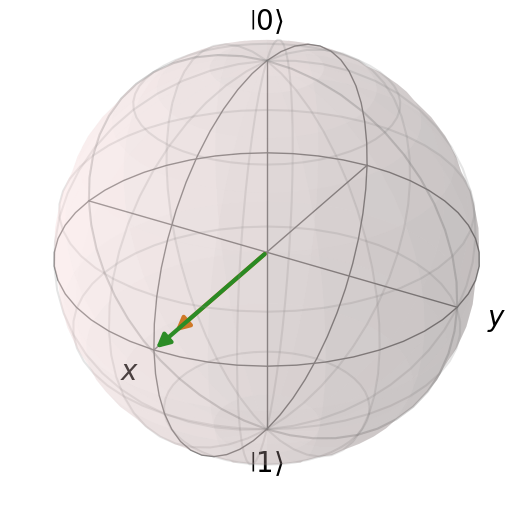

In [22]:
import numpy as np
from qutip import basis, ket2dm, Qobj, Bloch

# Define the initial quantum state
psi = basis(2, 0) + basis(2, 1)  # Superposition state |0> + |1>
psi = psi.unit()  # Normalize the state

# Density matrix
rho = ket2dm(psi)

# Phase damping channel
gamma = 0.3  # Decoherence probability
K0 = Qobj([[1, 0], [0, np.sqrt(1 - gamma)]])
K1 = Qobj([[0, 0], [0, np.sqrt(gamma)]])

# Apply the Kraus operators
rho_prime = K0 * rho * K0.dag() + K1 * rho * K1.dag()

# Print the result
print("Initial state density matrix:")
print(rho)

print("\nState after phase damping:")
print(rho_prime)

# Visualize on the Bloch sphere
b = Bloch()
b.add_states(rho)       # Initial state
b.add_states(rho_prime) # Final state
b.show()


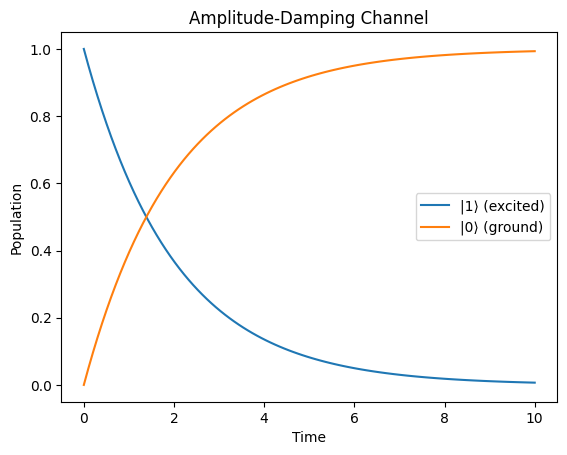

In [21]:
from qutip import basis, mesolve, destroy, expect, sigmax
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define basis states
excited_state = basis(2, 1)  # |1⟩ state
ground_state = basis(2, 0)   # |0⟩ state

# Step 2: Initial state - excited state
initial_state = excited_state
H= 0*sigmax()
# Step 3: Define the amplitude-damping operator
gamma = 0.5  # Damping rate
c_op = np.sqrt(gamma) * destroy(2)  # Collapse operator for amplitude damping

# Step 4: Define time evolution
tlist = np.linspace(0, 10, 100)  # Time points for simulation
result = mesolve(H,initial_state, tlist, [c_op], [])

# Step 5: Calculate expectation values for |1⟩ and |0⟩
p_excited = expect(excited_state * excited_state.dag(), result.states)
p_ground = expect(ground_state * ground_state.dag(), result.states)

# Step 6: Plot results
plt.plot(tlist, p_excited, label="|1⟩ (excited)")
plt.plot(tlist, p_ground, label="|0⟩ (ground)")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.title("Amplitude-Damping Channel")
plt.show()


In [18]:
from qutip import basis, qeye, sigmax, sigmay, sigmaz
import numpy as np 

initial_state = basis(2,0)
p=0.3
K0 = np.sqrt(1-3*p/4)*qeye(2)
K1 = np.sqrt(p/4)*sigmax()
K2 = np.sqrt(p/4)*sigmay()
K3 = np.sqrt(p/4)*sigmaz()
kraus_operator = [K0,K1,K2,K3]

final_state = sum([K*initial_state*initial_state.dag()*K.dag() for K in kraus_operator])
print("Initial State:\n", initial_state)
print("Final State (after phase-flip):\n", final_state)

Initial State:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Final State (after phase-flip):
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.85 0.  ]
 [0.   0.15]]


In [16]:
from qutip import basis, qeye, sigmax
import numpy as np 

initial_state = basis(2,0)
p=0.3
K0 = np.sqrt(1-p)*qeye(2)
K1 = np.sqrt(p)*sigmax()
kraus_operator = [K0,K1]

final_state = sum([K*initial_state*initial_state.dag()*K.dag() for K in kraus_operator])
print("Initial State:\n", initial_state)
print("Final State (after bit-flip):\n", final_state)
#for channel flip, replace sigmax with sigmaz

Initial State:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Final State (after bit-flip):
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.7 0. ]
 [0.  0.3]]


In [5]:
import numpy as np 
from qutip import basis, ket2dm, sigmax,sigmay,sigmaz,expect

pure_state = (basis(2,0) + basis(2,1)).unit()
rho_pure = ket2dm(pure_state)
rho_mixed = 0.5 * ket2dm(basis(2, 0)) + 0.5 * ket2dm(basis(2, 1))
sigma_x_exp_pure = expect(sigmax(), rho_pure)
sigma_y_exp_pure = expect(sigmay(), rho_pure)
sigma_z_exp_pure = expect(sigmaz(), rho_pure)

sigma_x_exp_mixed = expect(sigmax(), rho_mixed)
sigma_y_exp_mixed = expect(sigmay(), rho_mixed)
sigma_z_exp_mixed = expect(sigmaz(), rho_mixed)

# Display results
print("Pure state density matrix:\n", rho_pure)
print("\nMixed state density matrix:\n", rho_mixed)
print("\nExpectation values for pure state:")
print(f"⟨σx⟩: {sigma_x_exp_pure}, ⟨σy⟩: {sigma_y_exp_pure}, ⟨σz⟩: {sigma_z_exp_pure}")
print("\nExpectation values for mixed state:")
print(f"⟨σx⟩: {sigma_x_exp_mixed}, ⟨σy⟩: {sigma_y_exp_mixed}, ⟨σz⟩: {sigma_z_exp_mixed}")

Pure state density matrix:
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

Mixed state density matrix:
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

Expectation values for pure state:
⟨σx⟩: 0.9999999999999998, ⟨σy⟩: 0.0, ⟨σz⟩: 0.0

Expectation values for mixed state:
⟨σx⟩: 0.0, ⟨σy⟩: 0.0, ⟨σz⟩: 0.0


In [4]:
import numpy as np
from qutip import Qobj, tensor, basis

# Define quantum gates using NumPy and convert them to Qobj for QuTiP compatibility

# Hadamard gate for a single qubit
H = Qobj([[1, 1], [1, -1]]) / np.sqrt(2)

# Identity gate for a single qubit
I = Qobj(np.eye(2))

# CNOT gate for two qubits
CNOT = Qobj([
    [1, 0, 0, 0],  # |00⟩ → |00⟩
    [0, 1, 0, 0],  # |01⟩ → |01⟩
    [0, 0, 0, 1],  # |10⟩ → |11⟩
    [0, 0, 1, 0]   # |11⟩ → |10⟩
])

# Step 1: Initialize 2-qubit state |00⟩
q00 = tensor(basis(2, 0), basis(2, 0))  # This is a 2-qubit state

# Step 2: Apply Hadamard gate to the first qubit
# Tensor product to apply Hadamard to the first qubit and identity to the second qubit
H_full = tensor(H, I)  # Apply Hadamard to the first qubit
state_h = H_full * q00  # Resulting 2-qubit state

# Step 3: Apply CNOT gate
bell_state = CNOT * state_h  # Apply CNOT to the 2-qubit state

# Display the Bell state
print("Bell state |Φ+⟩:\n", bell_state)

# Define measurement operators (projectors for |00⟩ and |11⟩)
P00 = tensor(basis(2, 0) * basis(2, 0).dag(), basis(2, 0) * basis(2, 0).dag())
P11 = tensor(basis(2, 1) * basis(2, 1).dag(), basis(2, 1) * basis(2, 1).dag())

# Calculate probabilities of outcomes
prob_00 = (bell_state.dag() * P00 * bell_state).full()[0, 0].real
prob_11 = (bell_state.dag() * P11 * bell_state).full()[0, 0].real

print(f"Probability of |00⟩: {prob_00}")
print(f"Probability of |11⟩: {prob_11}")


TypeError: incompatible dimensions [[4], [4]] and [[2, 2], [1, 1]]

In [18]:
from qutip import basis, mesolve, sigmax, sigmaz,sigmay, destroy, expect, Qobj, Bloch
import numpy as np
q0 = basis(2,0)
q1 = basis(2,1)

H= Qobj(1/np.sqrt(2) * np.array([[1, 1], [1, -1]]))
state_h = H*q0

X=sigmax()
state_x = X*q0

Z = sigmaz()
state_z = Z*q0

print("Original |0⟩ state:\n", q0)
print("After Hadamard gate:\n", state_h)
print("After Pauli-X gate:\n", state_x)
print("After Pauli-Z gate to |1⟩:\n", state_z)

Original |0⟩ state:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
After Hadamard gate:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]
After Pauli-X gate:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]
After Pauli-Z gate to |1⟩:
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]


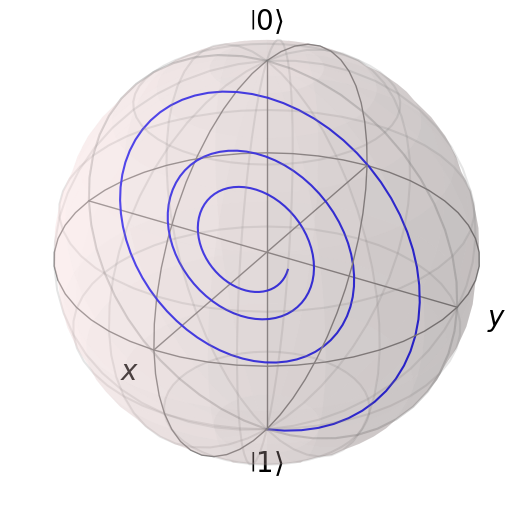

In [16]:
from qutip import basis, mesolve, sigmax, sigmaz,sigmay, destroy, expect, Qobj, Bloch
import numpy as np

# Parameters
omega = 1.0  # Rabi oscillation frequency
gamma = 0.2  # Decay rate

# Define operators
H = omega * sigmax()  # Hamiltonian: Rabi oscillations
c_op = [np.sqrt(gamma) * destroy(2)]  # Collapse operator: dissipation

# Initial state: excited state |1⟩
initial_state = basis(2, 1)

# Time evolution
tlist = np.linspace(0, 10, 200)  # Time from 0 to 10 with 200 points
result = mesolve(H, initial_state, tlist, c_op, [sigmax(), sigmay(), sigmaz()])

# Extract expectation values
x_expectation = result.expect[0]
y_expectation = result.expect[1]
z_expectation = result.expect[2]

# Create Bloch sphere
bloch = Bloch()

# Add trajectory to the Bloch sphere
bloch.add_points([x_expectation, y_expectation, z_expectation], meth='l')

# Render Bloch sphere
bloch.show()


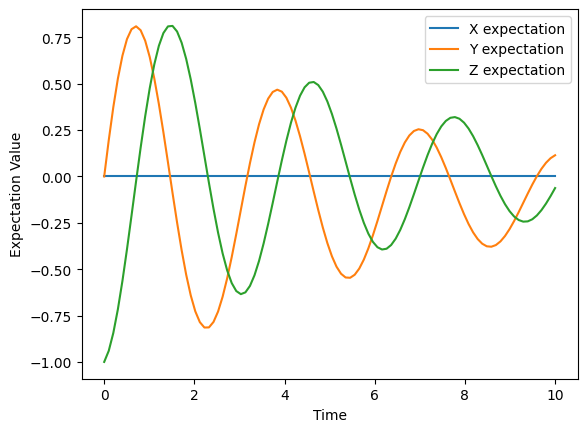

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from qutip import basis, mesolve, sigmax, sigmaz,sigmay, destroy, expect, Bloch, Qobj

omega = 1.0
gamma = 0.2

H=omega*sigmax()
c_op = [np.sqrt(gamma)*destroy(2)]

initial_state = basis(2,1)

tlist = np.linspace(0,10,100)

result = mesolve(H,initial_state,tlist,c_op,[sigmax(),sigmay(),sigmaz()])

plt.plot(tlist, result.expect[0], label="X expectation")
plt.plot(tlist, result.expect[1], label="Y expectation")
plt.plot(tlist, result.expect[2], label="Z expectation")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.show()

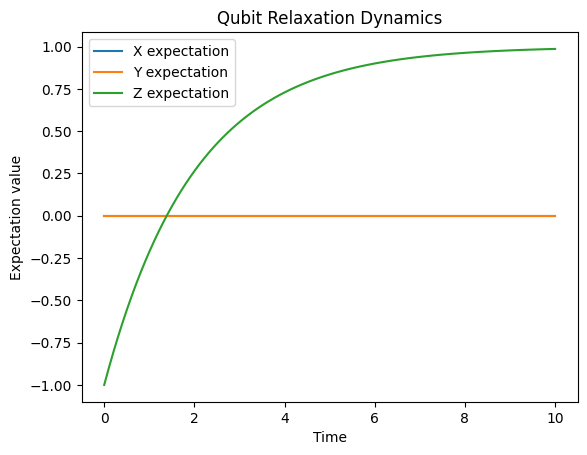

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, mesolve, sigmax, sigmaz,sigmay, destroy, expect, Bloch, Qobj

ground_state = basis(2,0)
excited_state = basis(2,1)

initial_state = excited_state

H= Qobj(np.zeros((2,2)))

gamma = 0.5
c_op = [np.sqrt(gamma)*destroy(2)]

tlist = np.linspace(0,10,100)

result = mesolve(H,initial_state,tlist,c_op,[sigmax(),sigmay(),sigmaz()])

plt.plot(tlist, result.expect[0], label="X expectation")
plt.plot(tlist, result.expect[1], label="Y expectation")
plt.plot(tlist, result.expect[2], label="Z expectation")

plt.xlabel("Time")
plt.ylabel("Expectation value")
plt.legend()
plt.title("Qubit Relaxation Dynamics")
plt.show()


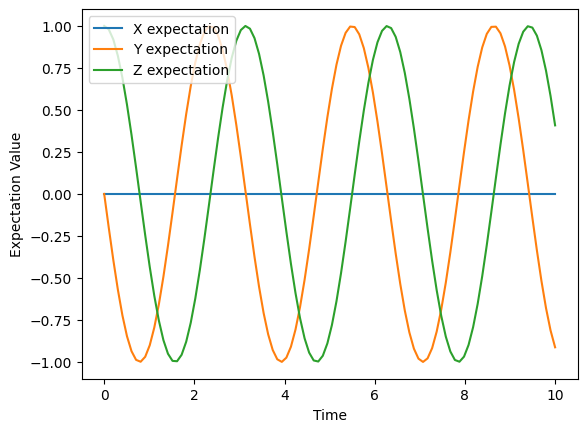

In [4]:
from qutip import basis, mesolve, sigmax, sigmaz,sigmay, destroy, expect, Bloch
import numpy as np

# Define a qubit Hamiltonian (simple one)
H = sigmax()

# Define the initial state (|0> state)
state0 = basis(2, 0)

# Define a list of times at which we want to solve
tlist = np.linspace(0, 10, 100)

# Solve the time evolution
result = mesolve(H, state0,tlist,[],[sigmax(), sigmay(), sigmaz()])
import matplotlib.pyplot as plt

plt.plot(result.times, result.expect[0], label="X expectation")
plt.plot(result.times, result.expect[1], label="Y expectation")
plt.plot(result.times, result.expect[2], label="Z expectation")
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()



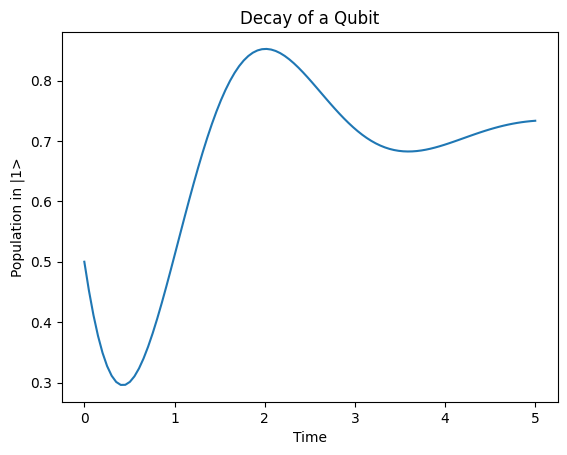

In [7]:
from qutip import basis, mesolve, sigmax, sigmaz, destroy, expect, Bloch
import numpy as np

# Define initial state |1>
psi0 = basis(2, 1)

# Define the Hamiltonian (no energy term for simplicity)
H = sigmax()

# Time list
tlist = np.linspace(0, 5, 100)

# Collapse operator (describes energy loss)
c_op = [destroy(2)]  # 'destroy' represents the lowering operator

# Solve the master equation
result = mesolve(H, psi0, tlist, c_op)

# Plot the population of |1> over time
p_ex = [expect(sigmay(), state) for state in result.states]

# Visualization
import matplotlib.pyplot as plt

plt.plot(tlist, (1 - np.array(p_ex)) / 2)
plt.xlabel('Time')
plt.ylabel('Population in |1>')
plt.title('Decay of a Qubit')
plt.show()


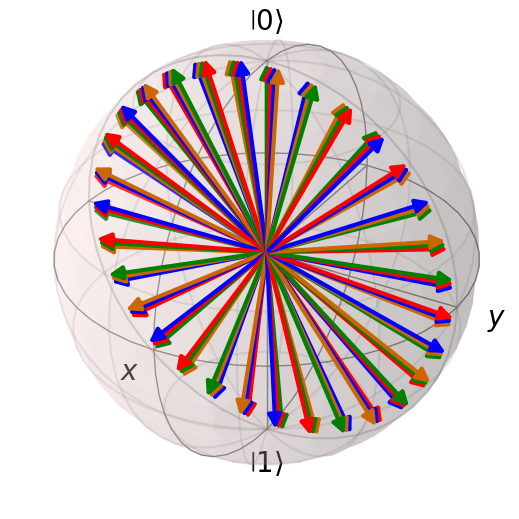

In [33]:
import numpy as np
from qutip import Bloch, basis, ket, sigmax, sigmay, sigmaz, Qobj
from qutip import sesolve
tlist = np.linspace(0,10,100)
psi0 = basis(2,0)
H=sigmax()
result=sesolve(H,psi0,tlist)
b=Bloch()
for state in result.states:
    b.add_states(state)
b.show()

In [22]:
from qutip import Qobj, sigmax  # noqa: F403
import numpy as np
initial_state = basis(2,0)
H=sigmax()
new_state=H*initial_state
print(new_state)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]


In [11]:
density_matrix=plus_state*plus_state.dag()
print(density_matrix)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


In [2]:
from qutip import basis
plus_state = (basis(2,0)+basis(2,1)).unit()
print("Plus State (|+>): ",plus_state)

Plus State (|+>):  Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]


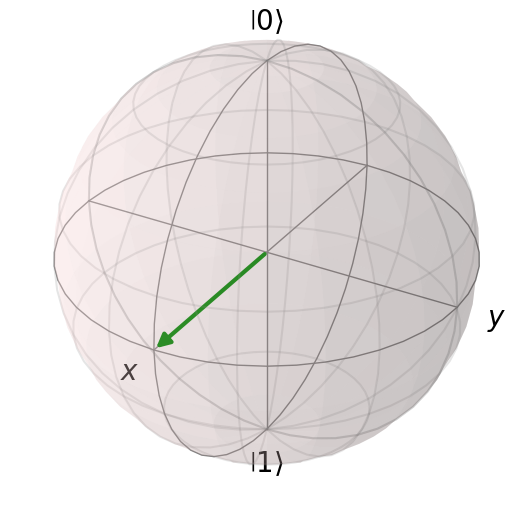

In [8]:
from qutip import Bloch
b=Bloch()
b.add_states(plus_state)
b.show()

In [1]:
from qutip import basis
zero_state = basis(2,0)
one_state = basis(2,1)
print("Zero_State |0> :",zero_state)
print("One_State |1> :",one_state)

Zero_State |0> : Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
One_State |1> : Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]
